In [5]:
#Resume Screening with NLP
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, roc_auc_score, precision_recall_curve, average_precision_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  15 non-null     object
 1   Resume    15 non-null     object
dtypes: object(2)
memory usage: 368.0+ bytes


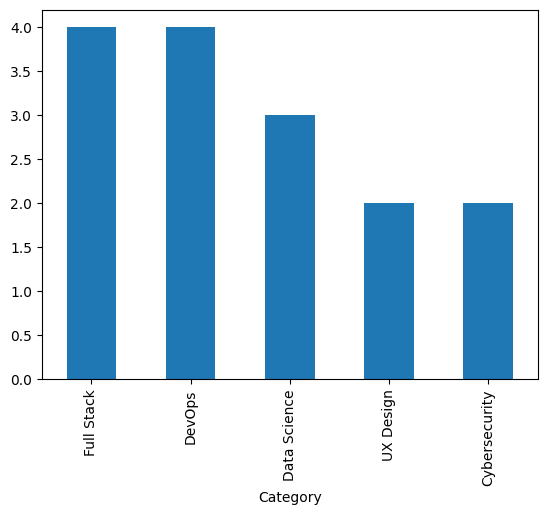

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/home/karan/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [11]:
#load the dataset
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()
df.info()
#Data Science,"Education Details May 2013 to May 2017 B.E   UIT-RGPV Data Scientist Data Scientist - Matelabs Skill Details Python- Exprience - Less than 1 year months Statsmodels- Exprience - 12 months AWS- Exprience - Less than 1 year months Machine learning- Exprience - Less than 1 year months Sklearn- Exprience - Less than 1 year months Scipy- Exprience - Less than 1 year months Keras- Exprience - Less than 1 year monthsCompany Details company - Matelabs description - ML Platform for business professionals, dummies and enthusiasts. 60/A Koramangala 5th block, Achievements/Tasks behind sukh sagar, Bengaluru, India                               Developed and deployed auto preprocessing steps of machine learning mainly missing value treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction. Deployed automated classification and regression model. linkedin.com/in/aditya-rathore- b4600b146                           Reasearch and deployed the time series forecasting model ARIMA, SARIMAX, Holt-winter and Prophet. Worked on meta-feature extracting problem. github.com/rathorology Implemented a state of the art research paper on outlier detection for mixed attributes. company - Matelabs description - "
df['Category'].value_counts()
df['Category'].value_counts().plot(kind='bar')
plt.show()
#Data Preprocessing
#Cleaning the text
corpus = []
for i in range(0, len(df)):
    resume = re.sub('[^a-zA-Z]', ' ', df['Resume'][i])
    resume = resume.lower()
    resume = resume.split()
    ps = PorterStemmer()
    resume = [ps.stem(word) for word in resume if not word in set(stopwords.words('english'))]
    resume = ' '.join(resume)
    corpus.append(resume)
#Creating the Bag of Words model
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df['Category']
#Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Training the Naive Bayes model on the Training set
classifier = GaussianNB()
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test)
#Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)
#Classification Report
classification_report = classification_report(y_test, y_pred)
print(classification_report)
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label='Data Science')
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
